# CQED_IELS 01 - Semi-classical IELS

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

from qutip import basis, hinton, qdiags

from src.pinem_spectrum import pinem_classical
from cQED_IELS import pinem_dm2spec

font = {'family': 'Sans','color':  'black','weight': 'normal','size': 12}
violet=(105./255,65./255,235./255)
bleu=(0./255,55./255,104./255)
orange_s=(255./255,69./255,0./255)

In [38]:
# Number of sidebands
n_sidebands=3
# Number of electron states
N=2*n_sidebands+1

#### Define electron momentum kick operators

In [39]:
b=qdiags([1]*(N-1), 1) 

In [40]:
b

Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]

In [41]:
b.dag()

Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]

#### Define scattering matrix

In [42]:
g=0.2
S=(g*(b.dag())-np.conj(g)*b).expm()

In [43]:
S

Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 9.80132890e-01 -1.97346631e-01  1.98007982e-02 -1.32270215e-03
   6.62234900e-05 -2.65146520e-06  8.85086693e-08]
 [ 1.97346631e-01  9.60332092e-01 -1.96023929e-01  1.97345747e-02
  -1.32005069e-03  6.61349813e-05 -2.65146520e-06]
 [ 1.98007982e-02  1.96023929e-01  9.60398315e-01 -1.96026580e-01
   1.97346632e-02 -1.32005069e-03  6.62234900e-05]
 [ 1.32270215e-03  1.97345747e-02  1.96026580e-01  9.60398227e-01
  -1.96026580e-01  1.97345747e-02 -1.32270215e-03]
 [ 6.62234900e-05  1.32005069e-03  1.97346632e-02  1.96026580e-01
   9.60398315e-01 -1.96023929e-01  1.98007982e-02]
 [ 2.65146520e-06  6.61349813e-05  1.32005069e-03  1.97345747e-02
   1.96023929e-01  9.60332092e-01 -1.97346631e-01]
 [ 8.85086693e-08  2.65146520e-06  6.62234900e-05  1.32270215e-03
   1.98007982e-02  1.97346631e-01  9.80132890e-01]]

#### Initial electron state

In [44]:
psi0 = basis(N,n_sidebands)

In [45]:
psi0

Quantum object: dims=[[7], [1]], shape=(7, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]

#### Calculate the final state from the $S$-matrix

In [46]:
psi_f=S*psi0

In [47]:
psi_f

Quantum object: dims=[[7], [1]], shape=(7, 1), type='ket', dtype=Dense
Qobj data =
[[-0.0013227 ]
 [ 0.01973457]
 [-0.19602658]
 [ 0.96039823]
 [ 0.19602658]
 [ 0.01973457]
 [ 0.0013227 ]]

#### Compute the density matrices

In [48]:
# Calculate the final electron density matrix
rho_f=psi_f*psi_f.dag()

In [49]:
rho_f

Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.74954099e-06 -2.61029645e-05  2.59284780e-04 -1.27032080e-03
  -2.59284780e-04 -2.61029645e-05 -1.74954099e-06]
 [-2.61029645e-05  3.89453440e-04 -3.86850120e-03  1.89530506e-02
   3.86850120e-03  3.89453440e-04  2.61029645e-05]
 [ 2.59284780e-04 -3.86850120e-03  3.84264203e-02 -1.88263580e-01
  -3.84264203e-02 -3.86850120e-03 -2.59284780e-04]
 [-1.27032080e-03  1.89530506e-02 -1.88263580e-01  9.22364754e-01
   1.88263580e-01  1.89530506e-02  1.27032080e-03]
 [-2.59284780e-04  3.86850120e-03 -3.84264203e-02  1.88263580e-01
   3.84264203e-02  3.86850120e-03  2.59284780e-04]
 [-2.61029645e-05  3.89453440e-04 -3.86850120e-03  1.89530506e-02
   3.86850120e-03  3.89453440e-04  2.61029645e-05]
 [-1.74954099e-06  2.61029645e-05 -2.59284780e-04  1.27032080e-03
   2.59284780e-04  2.61029645e-05  1.74954099e-06]]

(<Figure size 640x480 with 2 Axes>, <Axes: >)

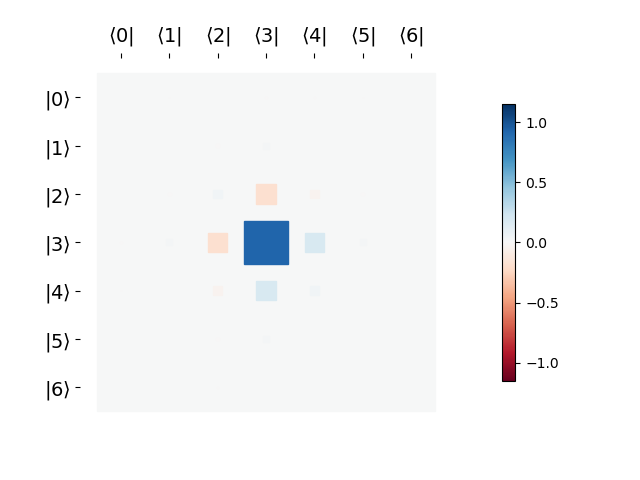

In [51]:
hinton(rho_f)

#### Plot the density matrices

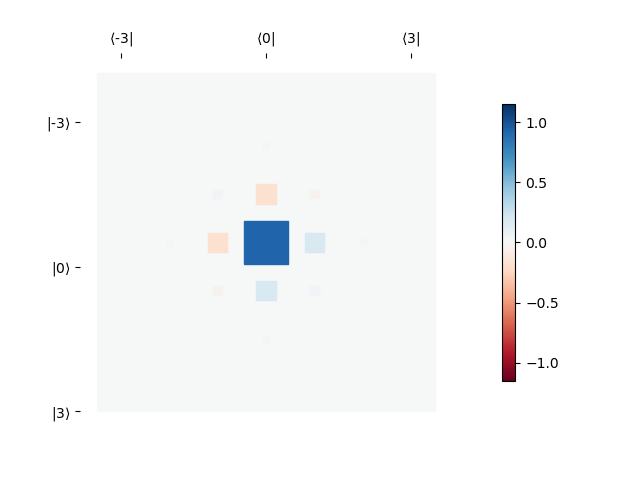

In [52]:
ylabel=[]
xlabel=[]
xtick=[]
ytick=[]

for i in range(N):
    if (i%3==0) & (np.abs(i-n_sidebands)<10):
        ylabel.append(r'$\vert$'+str(i-n_sidebands)+r'$\rangle$')
        xlabel.append(r'$\langle$'+str(i-n_sidebands)+r'$\vert$')
        xtick.append(i+0.5)
        ytick.append(i)
ylabel.reverse()

fig,ax=hinton(rho_f)
ax.set_yticks(ytick,ylabel,fontsize=10)
ax.set_xticks(xtick,xlabel,fontsize=10)
plt.show()

#filename='semiclassical_electron_DM.png'
#plt.savefig(filename,dpi=500,transparent=False)

#### Comparison with the analytical model 

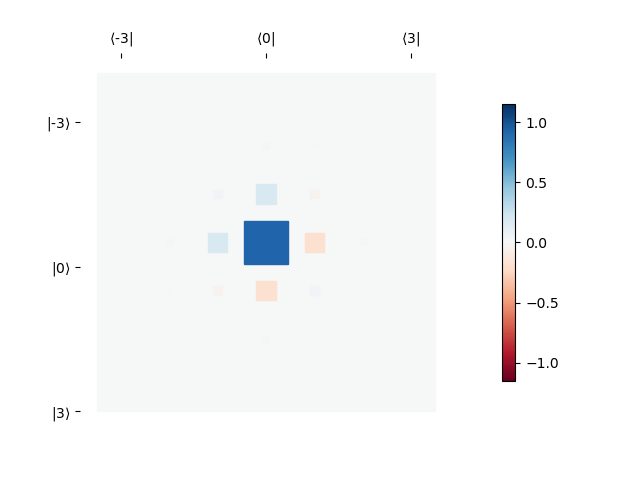

In [53]:
from scipy.special import jv

psi_f_analytical=0
for n in range(N):
     psi_f_analytical+=jv(n-n_sidebands,2*np.abs(g))*np.exp(1j*(n-n_sidebands)*np.angle(-g))*basis(N,n)

# Calculate the final analytical electron density matrix
rho_f_analytical=psi_f_analytical*psi_f_analytical.dag()

fig,ax=hinton(rho_f_analytical)
ax.set_yticks(ytick,ylabel,fontsize=10)
ax.set_xticks(xtick,xlabel,fontsize=10)

#### Compute PINEM spectrum

In [55]:
# Experimental parameters
ZLP_width=0.2
photon_energy=1.55
ene=np.linspace(-10,10,1000)

In [56]:
# Compute the PINEM spectrum from the cQED computation
spectre_from_dm=pinem_dm2spec(ene,rho_f,ZLP_width,photon_energy)

# PINEM spectrum from the analytical calculation
spectre_analytical=pinem_classical(ene,np.abs(g),1.0,0.0,ZLP_width,0.0,photon_energy,'temporal',10.0)
#spectre_analytical=pinem_dm2spec(ene,rho_f_analytical,ZLP_width,photon_energy)

/Users/lourenco/opt/anaconda3/envs/wigner2/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/lourenco/opt/anaconda3/envs/wigner2/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


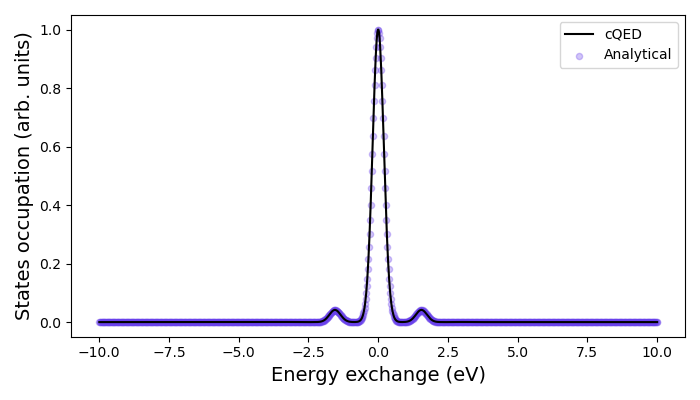

In [57]:
# Plot the two different PINEM spectra
plt.figure(figsize=(7,4))
violet=(105./255, 65./255, 235./255)
plt.plot(ene,spectre_from_dm/np.max(spectre_from_dm),c='k',label='cQED')
plt.scatter(ene,spectre_analytical/np.max(spectre_analytical),alpha=0.3,s=20,color=violet,label='Analytical')
plt.legend()
plt.xlabel('Energy exchange (eV)',fontsize=14)
plt.ylabel('States occupation (arb. units)',fontsize=14)
plt.tight_layout()
plt.show()